# 🧑‍🔬 Principal Component Analysis (PCA) Explained

---

## 🌟 What is PCA?
Principal Component Analysis (PCA) is an **unsupervised machine learning** technique for **dimensionality reduction**. It transforms a large set of variables into a smaller set that still contains most of the information.

---

## 🎯 Why Use PCA?
- **Reduces complexity** of data
- **Removes noise** and redundancy
- **Visualizes high-dimensional data** in 2D/3D
- **Speeds up** machine learning algorithms

---

## ⚙️ How Does PCA Work?
1. **Standardize** the data (mean=0, variance=1)
2. **Compute covariance matrix** to understand relationships
3. **Calculate eigenvectors & eigenvalues** of the covariance matrix
4. **Sort eigenvectors** by eigenvalues (importance)
5. **Project data** onto top principal components

---

## 🧮 PCA in Python (with scikit-learn)

```python
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# 1️⃣ Standardize
X_std = StandardScaler().fit_transform(X)

# 2️⃣ Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components:\n", principal_components)
```

---

## 🌍 Applications of PCA
- Image compression 🖼️
- Face recognition 😃
- Data visualization 📊
- Noise filtering 🔊

---

## ⚖️ Advantages & Limitations

**Advantages:**
- Simple & fast
- Removes correlated features
- Improves visualization

**Limitations:**
- Linear method (can't capture non-linear relationships)
- Components may be hard to interpret
- Sensitive

# Practical Example: PCA on the Penguine Dataset

In [53]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [54]:
# Importing the Dataset using Seaborn
df = sns.load_dataset("penguins")
# Display the first few rows of the dataset
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [55]:
# Let's check the Shape of the Dataset
print(f"Dataset Shape: {df.shape}")


Dataset Shape: (344, 7)


In [56]:
# Getting Information about the Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [57]:
# Getting the Summary Statistics
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [58]:
# Let's check for missing values in the dataset
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [59]:
# Let's define the function to impute the missing values using KNN Imputer.
from sklearn.impute import KNNImputer

def knn_fill_missing(df, n_neighbors=5):
    df_filled = df.copy()
    # Encode categorical columns
    cat_cols = df_filled.select_dtypes(include=['object', 'category']).columns
    encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df_filled[col] = df_filled[col].astype(str).replace('nan', np.nan)
        mask = df_filled[col].notnull()
        df_filled.loc[mask, col] = le.fit_transform(df_filled.loc[mask, col])
        encoders[col] = le

    # KNN Imputation
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df_filled = pd.DataFrame(imputer.fit_transform(df_filled), columns=df.columns)

    # Decode categorical columns
    for col in cat_cols:
        le = encoders[col]
        df_filled[col] = df_filled[col].round().astype(int)
        df_filled[col] = le.inverse_transform(df_filled[col])

    return df_filled


In [60]:
# Let's Again check for missing values after imputation.
df = knn_fill_missing(df)
print("Missing Values in Each Column After Imputation:")
print(df.isnull().sum())

Missing Values in Each Column After Imputation:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [61]:
# Let's again look the head of the dataset after imputation
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen           39.10           18.7              181.0   
1  Adelie  Torgersen           39.50           17.4              186.0   
2  Adelie  Torgersen           40.30           18.0              195.0   
3  Adelie  Torgersen           38.98           18.8              189.0   
4  Adelie  Torgersen           36.70           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3580.0  Female  
4       3450.0  Female  


In [62]:
# Let's encode using label encoder and sacle  the whole dataset using Standard Scaler
le = LabelEncoder()
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = le.fit_transform(df[col].astype(str))
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print(df_scaled.head())

    species    island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0 -1.029802  1.844076       -0.884973       0.786128          -1.419034   
1 -1.029802  1.844076       -0.811567       0.126275          -1.063023   
2 -1.029802  1.844076       -0.664757       0.430823          -0.422204   
3 -1.029802  1.844076       -0.906994       0.836886          -0.849417   
4 -1.029802  1.844076       -1.325405       1.090676          -0.564608   

   body_mass_g       sex  
0    -0.565516  1.011696  
1    -0.503139 -0.988439  
2    -1.189294 -0.988439  
3    -0.777601 -0.988439  
4    -0.939783 -0.988439  


In [63]:
# Let's implement PCA to reduce the dimensions of the dataset
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
print(df_pca.head())
# Explained Variance Ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_
}")
# Cumulative Explained Variance
print(f"Cumulative Explained Variance: {np.cumsum(pca.explained_variance_ratio_)}")


       PCA1      PCA2
0 -2.523867  1.156025
1 -2.277833 -0.614249
2 -2.333335 -0.507105
3 -2.576449 -0.316714
4 -2.755031 -0.317801
Explained Variance Ratio: [0.59341809 0.21669814]
Cumulative Explained Variance: [0.59341809 0.81011622]


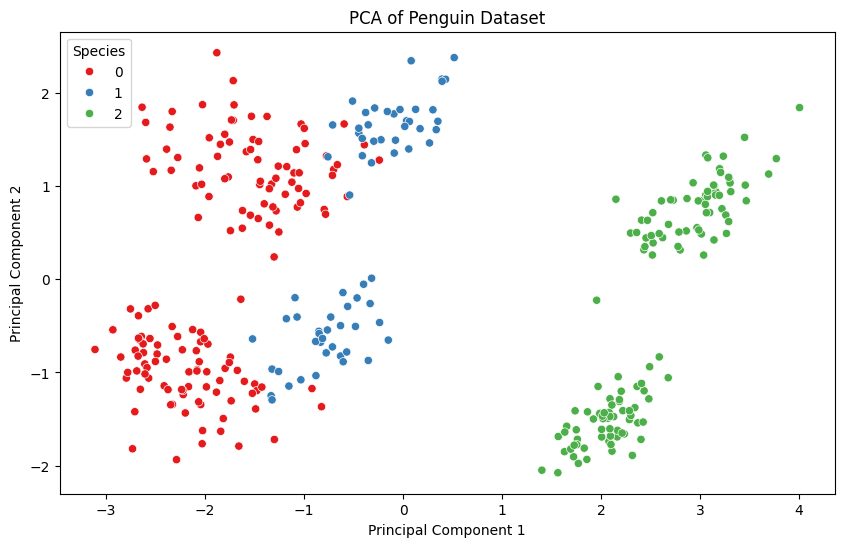

In [64]:
# Visaulizing the PCA Result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca, hue=df['species'], palette='Set1')
plt.title('PCA of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()


In [65]:
# Let's split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, df['species'], test_size=0.2, random_state=42)

# Define classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = (y_pred == y_test).mean()
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Select the best model
best_model = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model} with Accuracy: {results[best_model]:.4f}")




Random Forest Accuracy: 0.9275
Confusion Matrix:
[[29  3  0]
 [ 2 14  0]
 [ 0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.82      0.88      0.85        16
           2       1.00      1.00      1.00        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.93      0.93      0.93        69


Logistic Regression Accuracy: 0.8986
Confusion Matrix:
[[27  5  0]
 [ 2 14  0]
 [ 0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.74      0.88      0.80        16
           2       1.00      1.00      1.00        21

    accuracy                           0.90        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.91      0.90      0.90        69


Support Vec

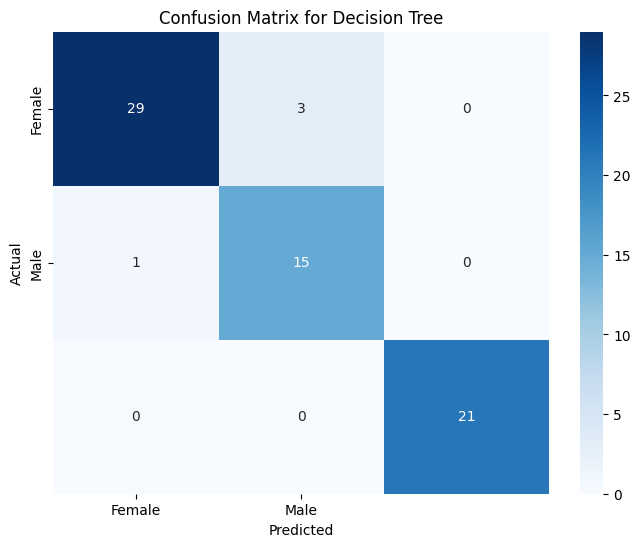

In [66]:
# Visualize the confusion matrix for the best model
best_clf = models[best_model]
y_pred_best = best_clf.predict(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model}')
plt.show()

PCA Loadings (Feature Contributions):
                        PC1       PC2       PC3       PC4       PC5       PC6  \
species            0.465095 -0.124822  0.260881 -0.040818 -0.101092  0.021104   
island            -0.357691  0.187391  0.644805  0.639092 -0.087272 -0.052882   
bill_length_mm     0.362893  0.286461  0.609734 -0.490361 -0.081145 -0.145223   
bill_depth_mm     -0.341254  0.513044  0.023602 -0.297263  0.651209  0.042474   
flipper_length_mm  0.457536  0.075839  0.036628  0.323192  0.386263  0.696569   
body_mass_g        0.434374  0.203681 -0.206608  0.386056  0.330850 -0.680854   
sex                0.097876  0.746186 -0.315922  0.087083 -0.541152  0.158410   

                        PC7  
species            0.829287  
island             0.048129  
bill_length_mm    -0.382552  
bill_depth_mm      0.324857  
flipper_length_mm -0.211442  
body_mass_g       -0.071300  
sex                0.091093  


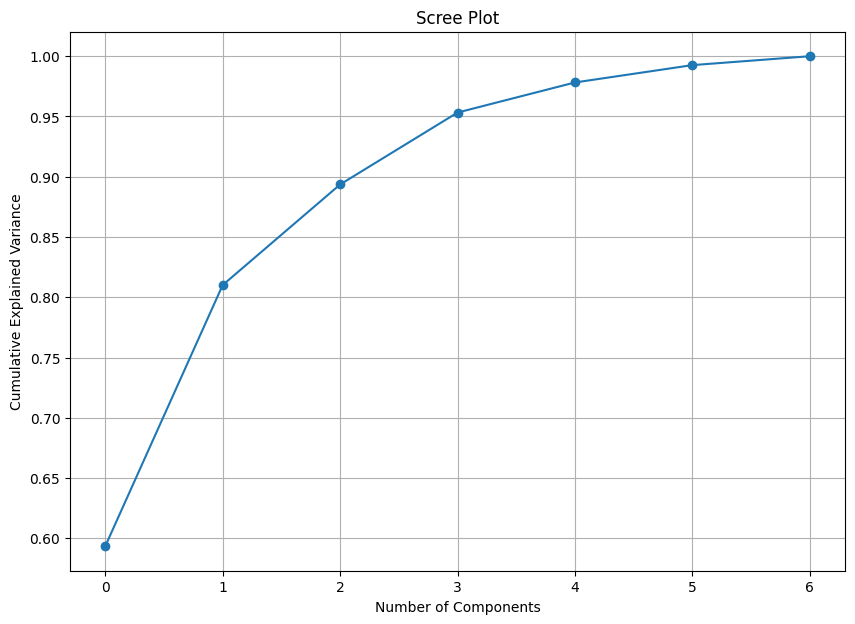

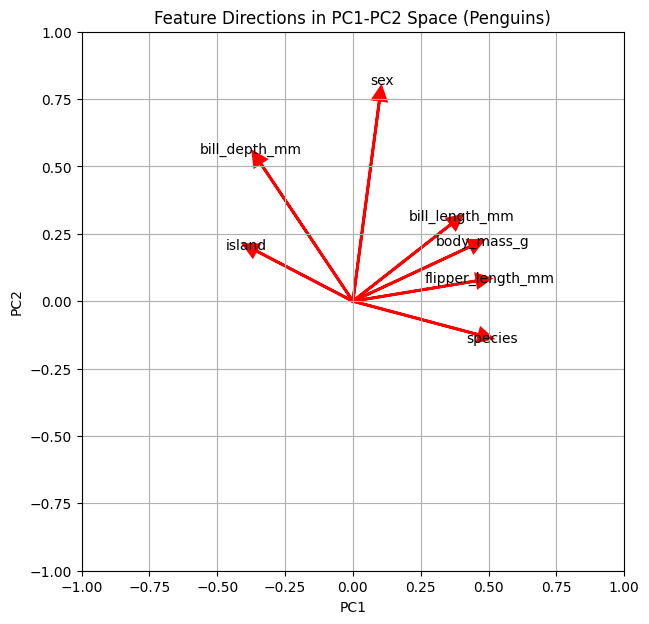

In [67]:
# Perform PCA with all components
pca = PCA()
pca.fit(df_scaled)

# Create a DataFrame to show the loadings (principal axes in feature space)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df_scaled.columns
)
print("PCA Loadings (Feature Contributions):")
print(loadings)

# Plot the explained variance (Scree Plot)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Biplot: Arrows for feature directions in PC1-PC2 space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, fc='r', ec='r')
    plt.text(v[0]*1.1, v[1]*1.1, df_scaled.columns[i], color='black', ha='center', va='center', fontsize=10)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Feature Directions in PC1-PC2 Space (Penguins)')
plt.grid()
plt.show()